In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
application_train= dd.read_csv("../../data/application_train.csv").compute()
a = application_train.shape
print("application_train shape :({},{})".format( a[0],a[1]))

POS_CASH_balance= dd.read_csv("../../data/POS_CASH_balance.csv").compute()
a = POS_CASH_balance.shape
print("POS_CASH_balance shape :({},{})".format( a[0],a[1]))

application_train shape :(307511,122)
POS_CASH_balance shape :(10001358,8)


In [3]:
POS_CASH_balance=application_train[['TARGET','SK_ID_CURR']].merge(POS_CASH_balance,on='SK_ID_CURR',how ='left')
del application_train

In [4]:
POS_CASH_balance.shape

(8561442, 9)

<h2>TARGET / MONTHS_BALANCE</h2>

In [22]:
POS_CASH_balance.MONTHS_BALANCE.describe()

count    8.543375e+06
mean    -3.494812e+01
std      2.605372e+01
min     -9.600000e+01
25%     -5.400000e+01
50%     -2.800000e+01
75%     -1.300000e+01
max     -1.000000e+00
Name: MONTHS_BALANCE, dtype: float64

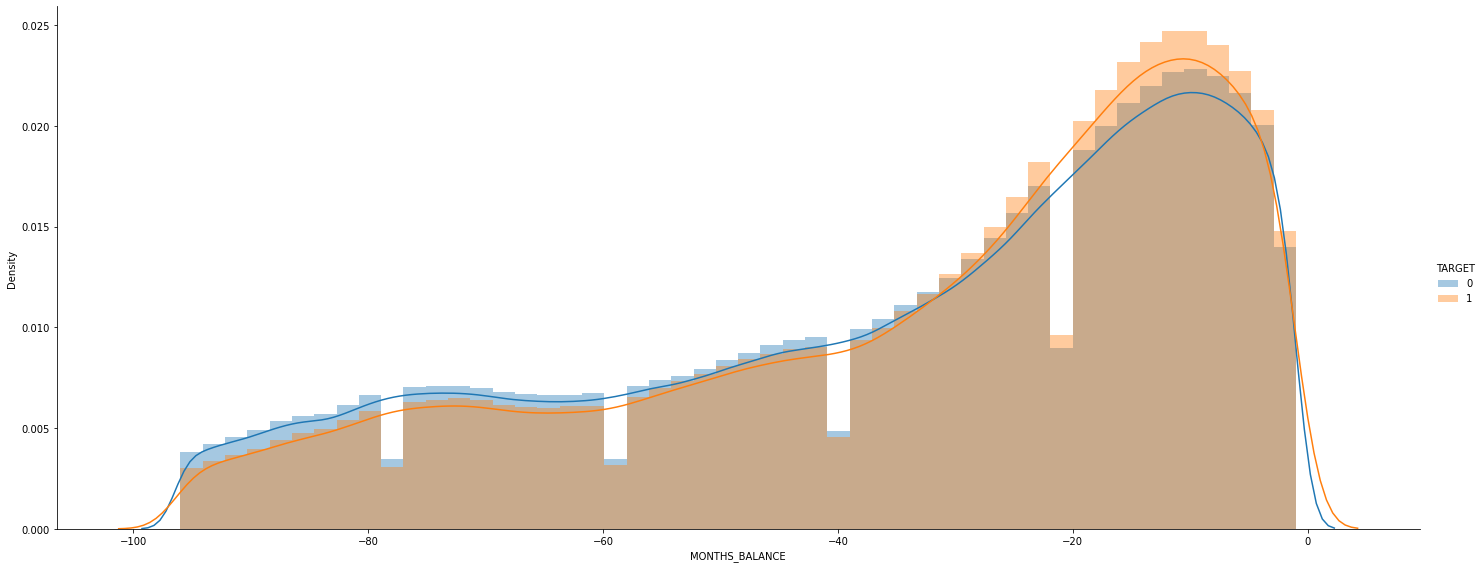

In [23]:
sns.FacetGrid(data=POS_CASH_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'MONTHS_BALANCE').add_legend()

* Si mois >-30 densite classe 1 devient > densite classe 0 

<h2>TARGET / CNT_INSTALMENT (Tranche a payer)</h2>

In [5]:
POS_CASH_balance.CNT_INSTALMENT.describe()

count    8.521512e+06
mean     1.703348e+01
std      1.200430e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_INSTALMENT, dtype: float64

* Variable entre 0 et 84 

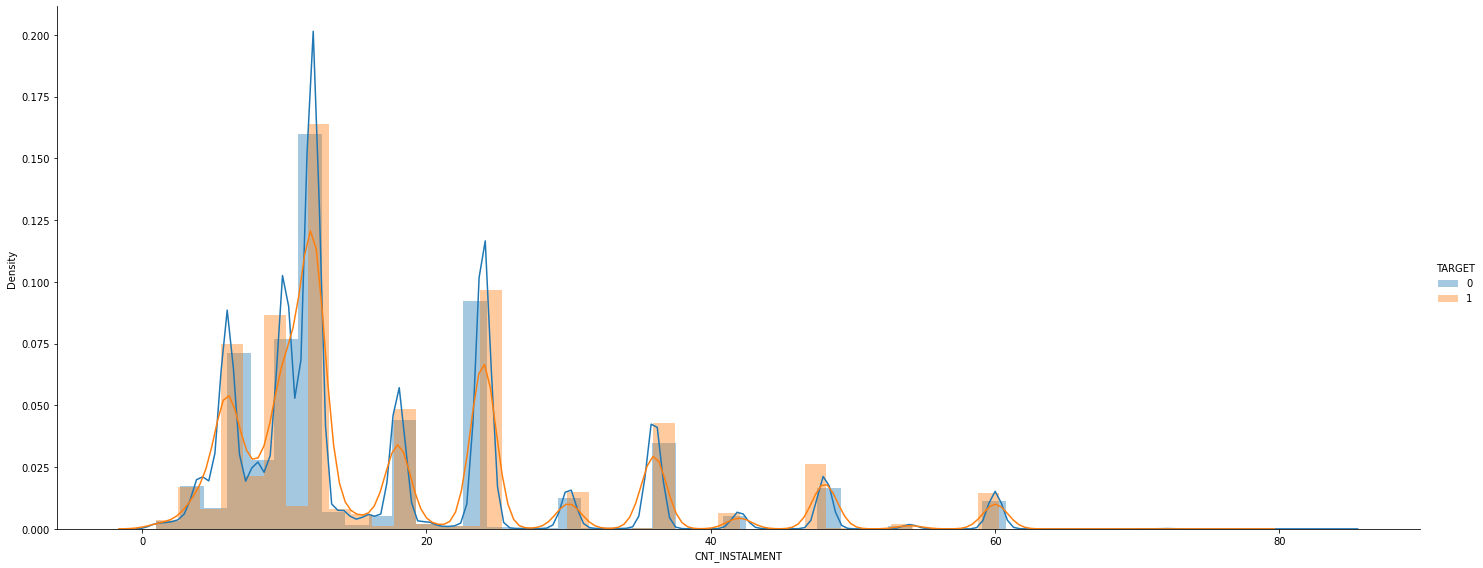

In [7]:
sns.FacetGrid(data=POS_CASH_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'CNT_INSTALMENT').add_legend()

* La densite de la classe 0 et > a la classe 1

<AxesSubplot:xlabel='TARGET', ylabel='CNT_INSTALMENT'>

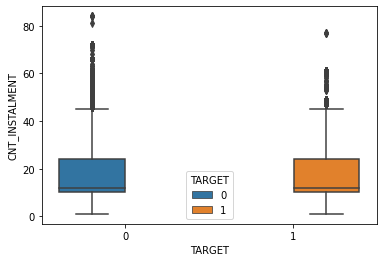

In [21]:
sns.boxplot(x='TARGET', y='CNT_INSTALMENT',hue='TARGET', data=POS_CASH_balance)

<h2>TARGET / CNT_INSTALMENT_FUTURE (Tranche restante a payer)</h2>

In [10]:
POS_CASH_balance.CNT_INSTALMENT_FUTURE.describe()

count    8.521497e+06
mean     1.046808e+01
std      1.114408e+01
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      8.400000e+01
Name: CNT_INSTALMENT_FUTURE, dtype: float64

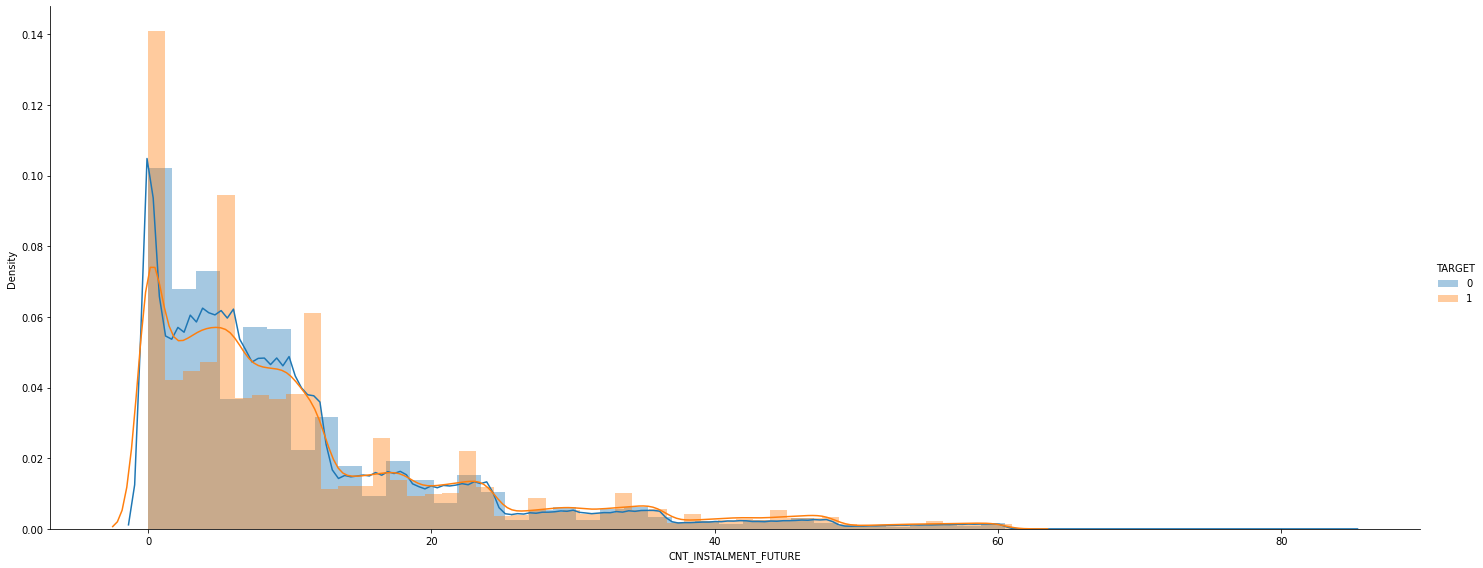

In [11]:
sns.FacetGrid(data=POS_CASH_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'CNT_INSTALMENT_FUTURE').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='CNT_INSTALMENT_FUTURE'>

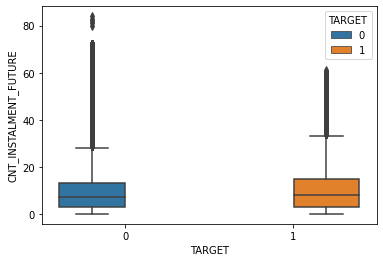

In [20]:
sns.boxplot(x='TARGET', y='CNT_INSTALMENT_FUTURE',hue='TARGET', data=POS_CASH_balance)

<h2>TARGET / NAME_CONTRACT_STATUS (Statut du contrat pendant le mois)</h2>

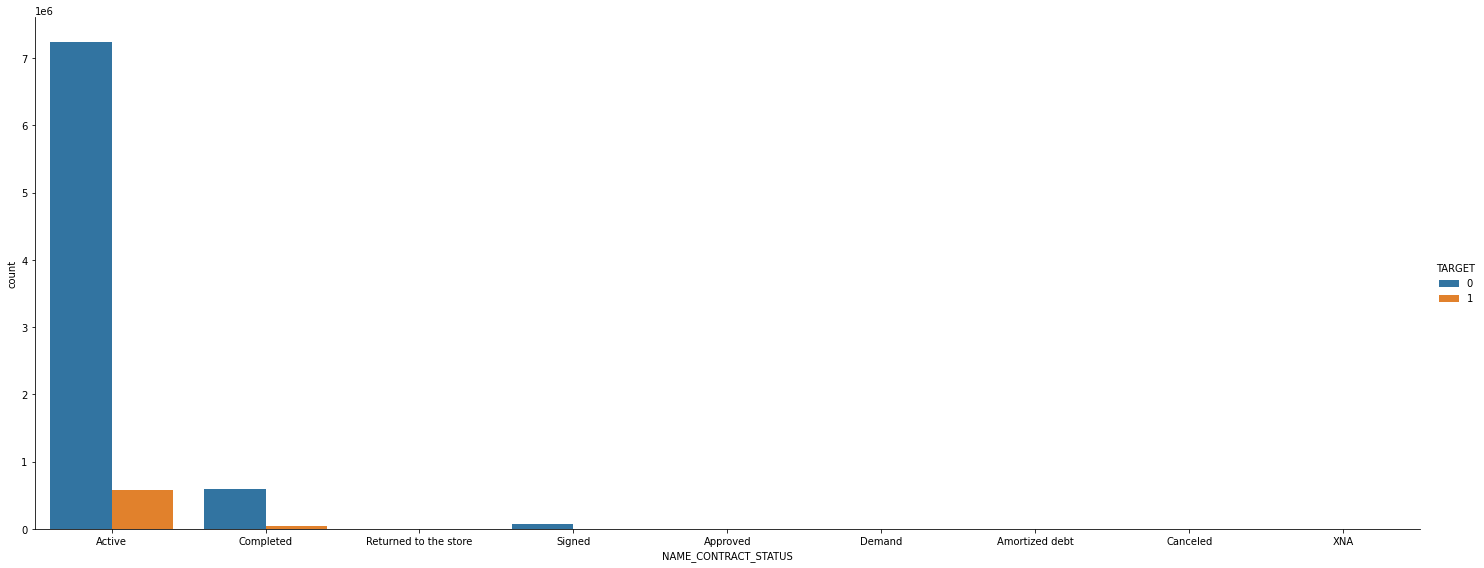

In [17]:
sns.catplot(x='NAME_CONTRACT_STATUS', kind="count",hue='TARGET', data=POS_CASH_balance , aspect=2.5, height=8)

<h2>TARGET / SK_DPD (DPD (jours passés) pendant le mois de crédit précédent)</h2>

In [13]:
POS_CASH_balance.SK_DPD.describe()

count    8.543375e+06
mean     1.190473e+01
std      1.340302e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.231000e+03
Name: SK_DPD, dtype: float64

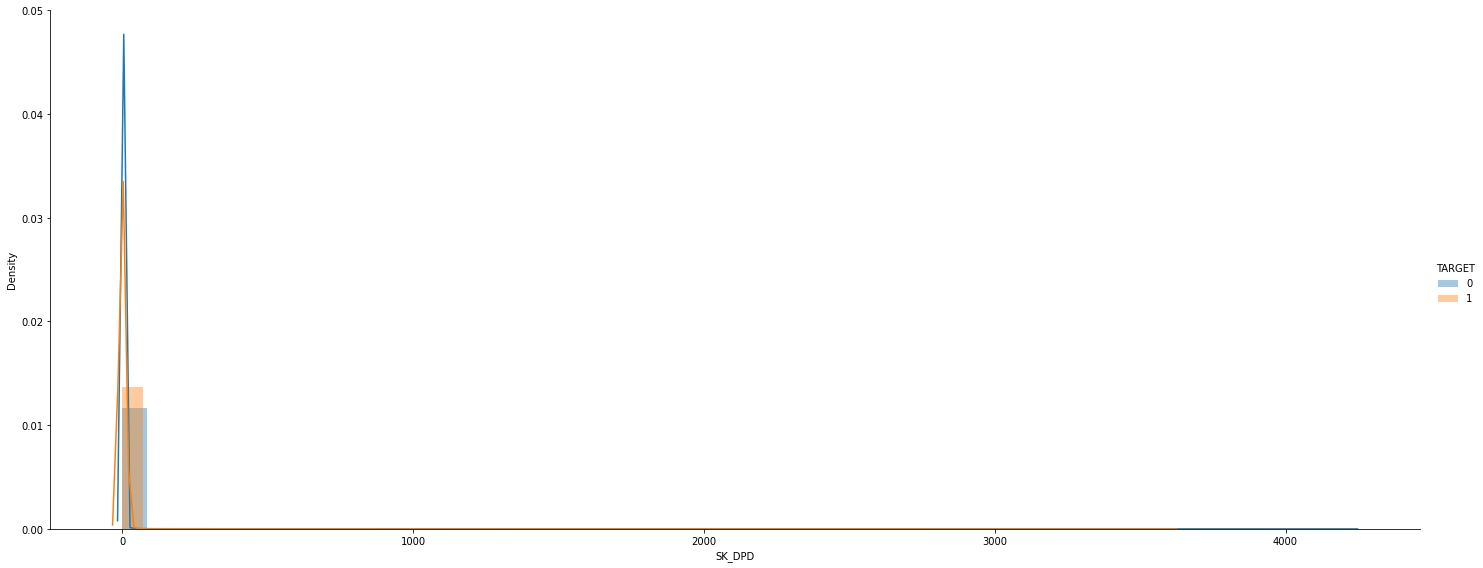

In [14]:
sns.FacetGrid(data=POS_CASH_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'SK_DPD').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='SK_DPD'>

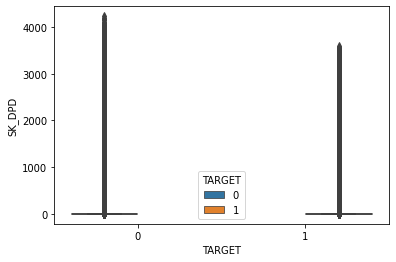

In [18]:
sns.boxplot(x='TARGET', y='SK_DPD',hue='TARGET', data=POS_CASH_balance)

<h2>TARGET / SK_DPD_DEF DPD pendant le mois avec tolérance (les dettes avec des montants de prêt faibles sont ignorés) du crédit précédent</h2>

In [15]:
POS_CASH_balance.SK_DPD_DEF.describe()

count    8.543375e+06
mean     5.835209e-01
std      3.042110e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.373000e+03
Name: SK_DPD_DEF, dtype: float64

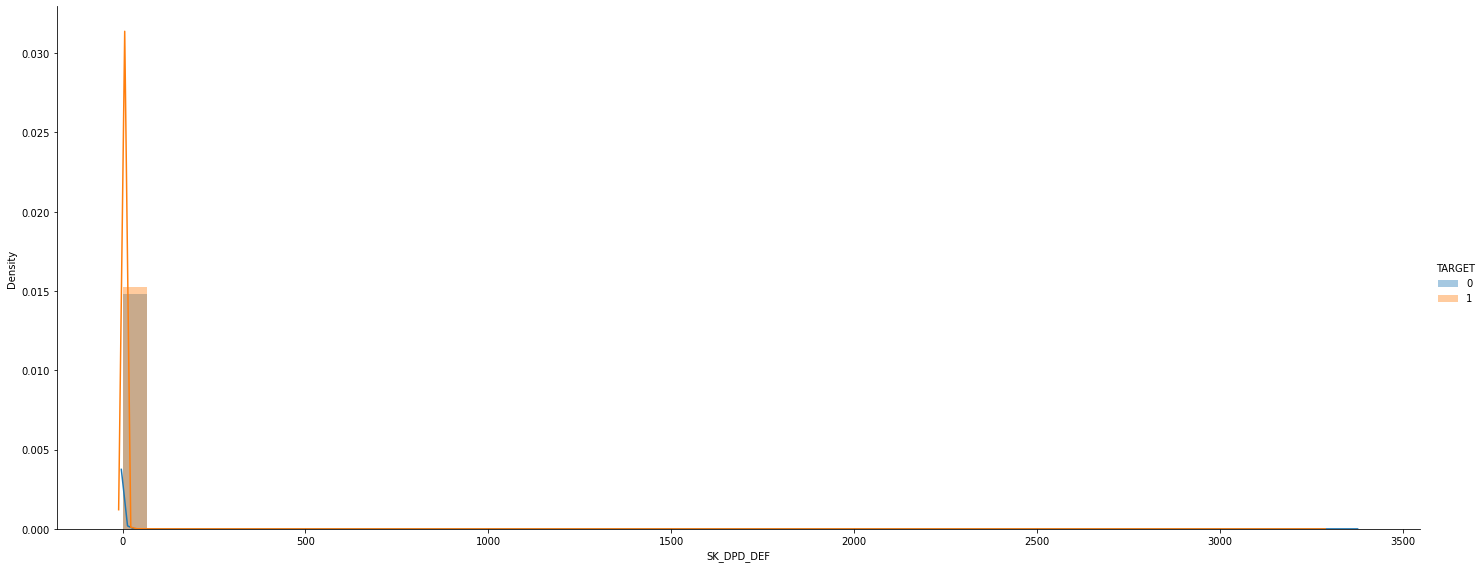

In [16]:
sns.FacetGrid(data=POS_CASH_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'SK_DPD_DEF').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='SK_DPD_DEF'>

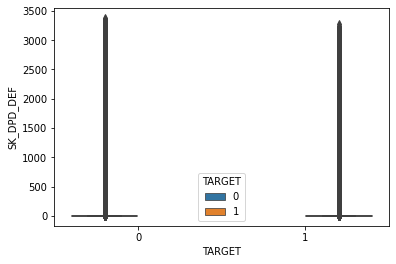

In [19]:
sns.boxplot(x='TARGET', y='SK_DPD_DEF',hue='TARGET', data=POS_CASH_balance)